# The Spark Foundation |  Data Science & Business Analyst Intern

> Submitted by : **SHIVJI**

## Task 5 : Exploratory Data Analysis on Sport (IPL)

### Objective : find out most successful teams, players and factors contributing win or loss of a team.

## 1. Importing required libraries

In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

## 2. Reading the data 

In [84]:
deliveries = pd.read_csv("./deliveries.csv")
matches = pd.read_csv("./matches.csv")

In [85]:
del_df = deliveries.copy(deep=True)
mat_df = matches.copy(deep=True)

##### 1. Delivery Df

In [86]:
del_df.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN


In [87]:
del_df.shape

(179078, 21)

##### 2. Match Df

In [88]:
mat_df.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN


In [89]:
mat_df.shape

(756, 18)

### => Merge the data

In [90]:
merge_df = pd.merge( del_df,mat_df, how="inner" , right_on="id", left_on="match_id")

In [91]:
# size of each dataset
print("============================================")
print("size of matches dataset : ",mat_df.shape )
print("============================================")
print("size of deliveries dataset : ",del_df.shape )
print("============================================")
print("size of merge dataset : ",merge_df.shape )
print("============================================")

size of matches dataset :  (756, 18)
size of deliveries dataset :  (179078, 21)
size of merge dataset :  (179078, 39)


In [92]:
merge_df.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [93]:
merge_df.shape

(179078, 39)

In [94]:
# duplicate values checking
merge_df.duplicated().sum()

23

In [95]:
# duplicate values 
merge_df[merge_df.duplicated()]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
52178,221,1,Mumbai Indians,Delhi Daredevils,4,1,SR Tendulkar,C Madan,PJ Sangwan,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,221,2010,Mumbai,2010-04-13,Mumbai Indians,Delhi Daredevils,Mumbai Indians,bat,normal,0,Mumbai Indians,39,0,KA Pollard,Brabourne Stadium,S Asnani,DJ Harper,NaN
162805,7946,1,Rajasthan Royals,Royal Challengers Bangalore,4,4,AM Rahane,RA Tripathi,UT Yadav,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,7946,2018,Jaipur,19/05/18,Rajasthan Royals,Royal Challengers Bangalore,Rajasthan Royals,bat,normal,0,Rajasthan Royals,30,0,S Gopal,Sawai Mansingh Stadium,Bruce Oxenford,Virender Kumar Sharma,C Shamshuddin
162806,7946,1,Rajasthan Royals,Royal Challengers Bangalore,4,5,AM Rahane,RA Tripathi,UT Yadav,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,7946,2018,Jaipur,19/05/18,Rajasthan Royals,Royal Challengers Bangalore,Rajasthan Royals,bat,normal,0,Rajasthan Royals,30,0,S Gopal,Sawai Mansingh Stadium,Bruce Oxenford,Virender Kumar Sharma,C Shamshuddin
162870,7946,1,Rajasthan Royals,Royal Challengers Bangalore,13,5,RA Tripathi,AM Rahane,YS Chahal,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,7946,2018,Jaipur,19/05/18,Rajasthan Royals,Royal Challengers Bangalore,Rajasthan Royals,bat,normal,0,Rajasthan Royals,30,0,S Gopal,Sawai Mansingh Stadium,Bruce Oxenford,Virender Kumar Sharma,C Shamshuddin
162964,7946,2,Royal Challengers Bangalore,Rajasthan Royals,10,1,AB de Villiers,Mandeep Singh,I Sodhi,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,7946,2018,Jaipur,19/05/18,Rajasthan Royals,Royal Challengers Bangalore,Rajasthan Royals,bat,normal,0,Rajasthan Royals,30,0,S Gopal,Sawai Mansingh Stadium,Bruce Oxenford,Virender Kumar Sharma,C Shamshuddin
166610,11144,2,Sunrisers Hyderabad,Rajasthan Royals,6,6,J Bairstow,DA Warner,J Archer,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,11144,2019,Hyderabad,29/03/19,Rajasthan Royals,Sunrisers Hyderabad,Rajasthan Royals,bat,normal,0,Sunrisers Hyderabad,0,5,Rashid Khan,Rajiv Gandhi Intl. Cricket Stadium,Bruce Oxenford,C Shamshuddin,KN Anantapadmanabhan
167990,11150,1,Royal Challengers Bangalore,Rajasthan Royals,10,1,PA Patel,S Hetmyer,K Gowtham,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,11150,2019,Jaipur,02/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,7,S Gopal,Sawai Mansingh Stadium,Marais Erasmus,Anil Dandekar,Nitin Menon
168080,11150,2,Rajasthan Royals,Royal Challengers Bangalore,4,4,JC Buttler,AM Rahane,N Saini,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,11150,2019,Jaipur,02/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,7,S Gopal,Sawai Mansingh Stadium,Marais Erasmus,Anil Dandekar,Nitin Menon
169404,11311,1,Royal Challengers Bangalore,Delhi Capitals,1,6,PA Patel,V Kohli,I Sharma,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,11311,2019,Bengaluru,07/04/19,Royal Challengers Bangalore,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,4,K Rabada,M. Chinnaswamy Stadium,S Ravi,Yeshwant Barde,O Nandan
170110,11314,1,Kolkata Knight Riders,Chennai Super Kings,3,1,N Rana,RV Uthappa,DL Chahar,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,11314,2019,Chennai,09/04/19,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,7,DL Chahar,M. A. Chidambaram Stadium,Rod Tucker,C Shamshuddin,Ulhas Gandhe


In [96]:
# droping the duplicate values

merge_df = merge_df.drop_duplicates()

In [97]:
merge_df.shape

(179055, 39)

In [98]:
# checking missing values 
merge_df.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170221
dismissal_kind      170221
fielder             172607
id                       0
season                   0
city                  1700
date                     0
team1                    0
team2                    0
toss_winner              0
toss_decision            0
result                   0
dl_applied               0
winner                 372
win_by_runs              0
win_by_wickets           0
player_of_match        372
venue                    0
umpire1                500
u

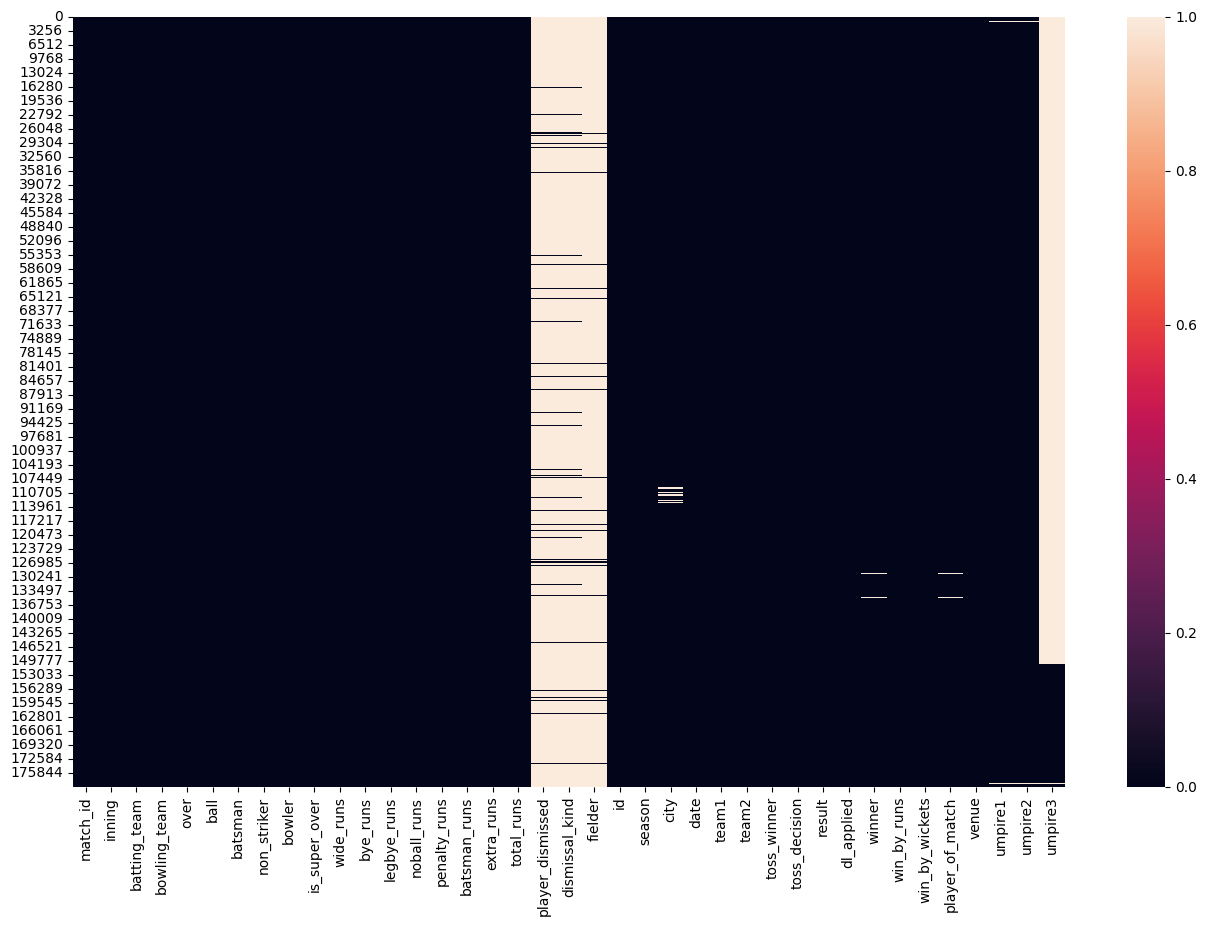

In [99]:
# visualizing missing values
plt.figure(figsize=(16,10))
sns.heatmap(merge_df.isna())
plt.show()

<span style='color:black; background:yellow;  
             padding:5px 25px; 
             font-size: 1.875em;   
             border-radius:20px; 
             border-color:red;  
             border-size:200px;'>Insight</span>
             
             
- This dataset have **179078 rows** and, **39 columns**.
- The **missing values are present** in dataset. Some columns have large number of missing values like **player_dismissed, dismissal_kind, fielder, umpire3** . Here **umpire3** have more missing value. So we drop this column.
- There are **23 duplicate values are present.** After removing duplicate values dataset shape is **179055 rows, 39 columns** .

## 3. Exploratory Data Analysis

### 3.1 Handling Missing values

In [100]:
mat_df.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

#### 3.1.1 Missing values  in "city" column

In [101]:
# find missing values in city column in match datafram 
mat_df[mat_df["city"].isnull()][["id", "city", "venue"]]

,id,city,venue
461,462,NaN,Dubai International Cricket Stadium
462,463,NaN,Dubai International Cricket Stadium
466,467,NaN,Dubai International Cricket Stadium
468,469,NaN,Dubai International Cricket Stadium
469,470,NaN,Dubai International Cricket Stadium
474,475,NaN,Dubai International Cricket Stadium
476,477,NaN,Dubai International Cricket Stadium


In [102]:
# locate missing value for approciate value filling
mat_df.loc[460:480, ['city', "venue"]]

,city,venue
460,Abu Dhabi,Sheikh Zayed Stadium
461,NaN,Dubai International Cricket Stadium
462,NaN,Dubai International Cricket Stadium
463,Sharjah,Sharjah Cricket Stadium
464,Abu Dhabi,Sheikh Zayed Stadium
465,Sharjah,Sharjah Cricket Stadium
466,NaN,Dubai International Cricket Stadium
467,Sharjah,Sharjah Cricket Stadium
468,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium


- As **all missing values** are from **"Dubai International Cricket Stadium"**. So we can fill the missing value by **"Dubai"**.

In [103]:
mat_df.city = mat_df["city"].fillna("Dubai")

#### 3.1.2 Missing values in "umpire3" column

In [104]:
# total missing values
mat_df.umpire3.isna().sum()

637

- **umpire3** column has many missing values. So we drop it.

In [105]:
mat_df  = mat_df.drop(columns=["umpire3"], axis=1) 

In [106]:
mat_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

#### 3.1.3 Missing values in "winner" column

In [107]:
mat_df[mat_df.winner.isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe


- Filling missing values with **"No Winner"**. Because there are **no winner** in these rows.

In [108]:
mat_df.winner = mat_df["winner"].fillna("No Winner")

#### 3.1.4 Missing values in "player_of_match" column

In [109]:
mat_df[mat_df.player_of_match.isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,No Winner,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,No Winner,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,No Winner,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,No Winner,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe


- Filling missing values with **"playe_of_match"**. Because there are **No Main player** in these rows.

In [110]:
mat_df.player_of_match = mat_df["player_of_match"].fillna("No Main Player")

#### 3.1.5 Missing values in "umpire1" column

In [111]:
mat_df[mat_df.umpire1.isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN


- Filling missing values with **"umpire1"**. Because there are **no umpire1** in these rows.

In [112]:
mat_df.umpire1 = mat_df["umpire1"].fillna("no umpire1")

#### 3.1.6 Missing values in "umpire2" column

In [113]:
mat_df[mat_df.umpire2.isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,no umpire1,NaN
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,no umpire1,NaN


- Filling missing values with **"umpire2"**. Because there are **no umpire2** in these rows.

In [114]:
mat_df.umpire2 = mat_df["umpire2"].fillna("no umpire2")

### 3.2 Visualizing Data

In [115]:
wins_per_season = mat_df.groupby("season")["winner"].value_counts()
wins_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
        No Winner                       1
Name: winner, Length: 103, dtype: int64

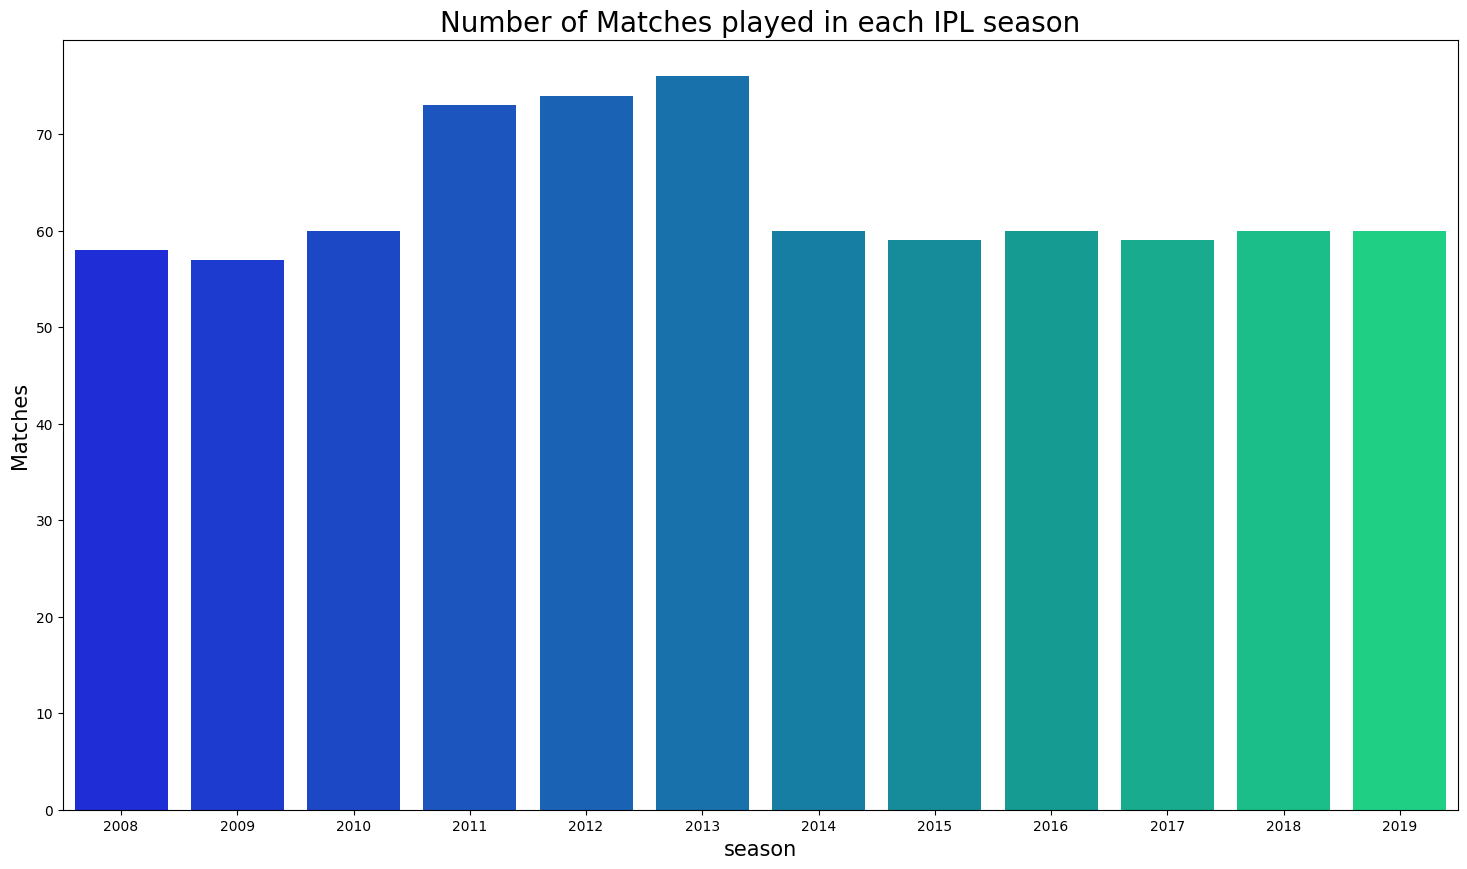

In [116]:
plt.figure(figsize = (18,10))
sns.countplot(x='season',data=mat_df,palette="winter")
plt.title("Number of Matches played in each IPL season",fontsize=20)
plt.xlabel("season",fontsize=15)
plt.ylabel('Matches',fontsize=15)
plt.show()

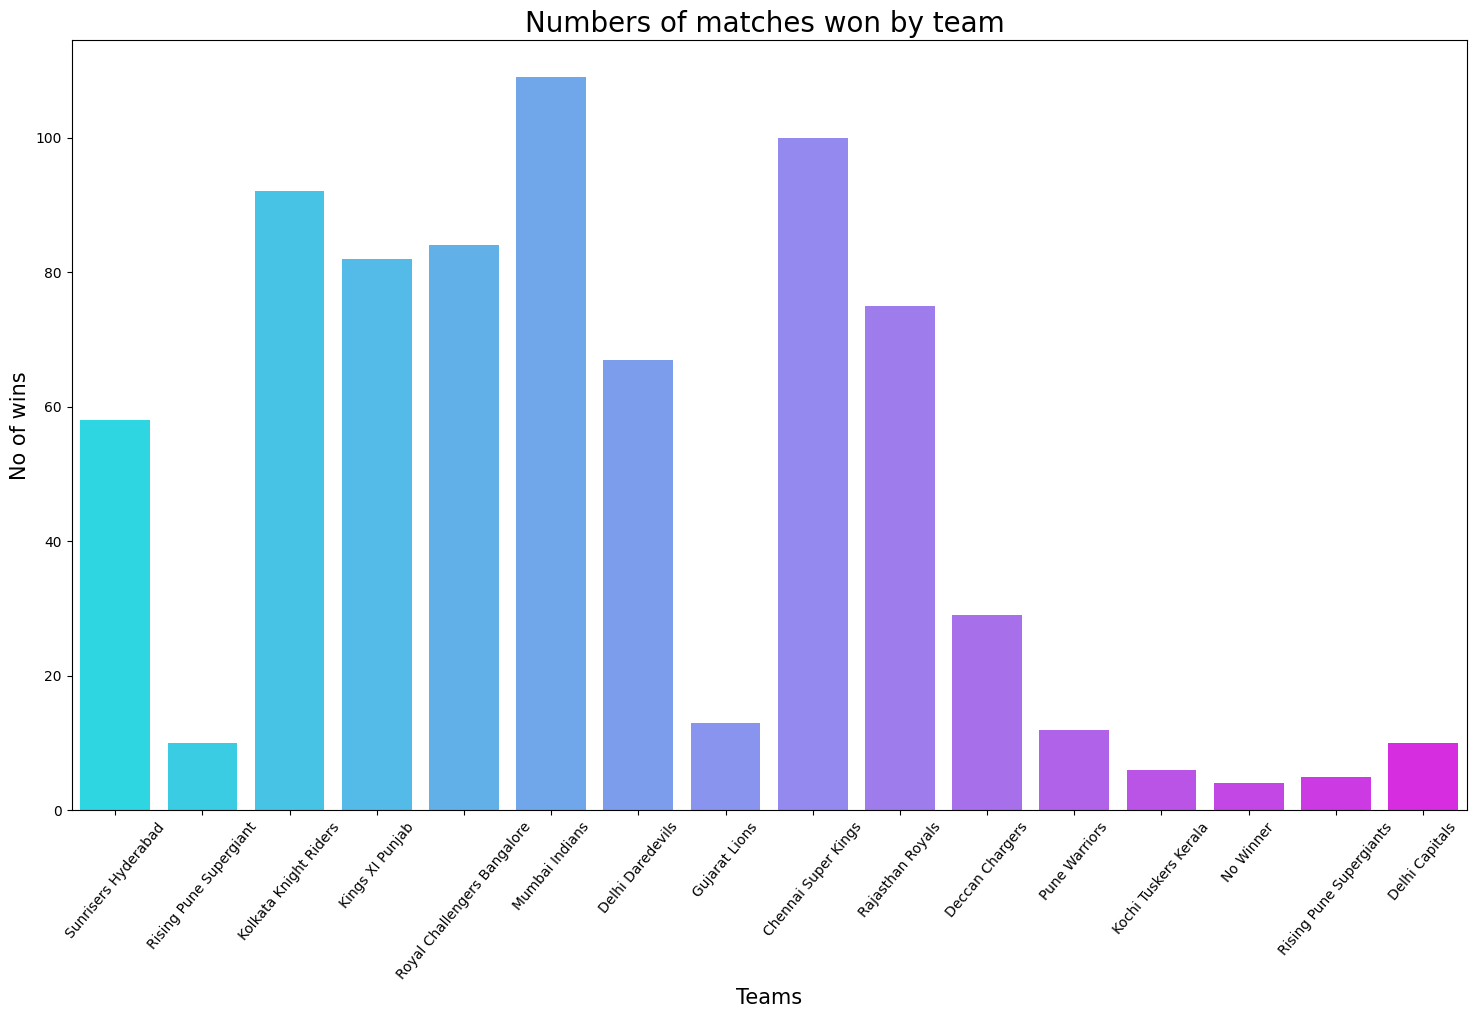

In [117]:
plt.figure(figsize = (18,10))
sns.countplot(x='winner',data=mat_df, palette='cool')
plt.title("Numbers of matches won by team ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Teams",fontsize=15)
plt.ylabel("No of wins",fontsize=15)
plt.show()

In [118]:
mat_df['win_by']=np.where(mat_df['win_by_runs']>0,'Bat first','Bowl first')

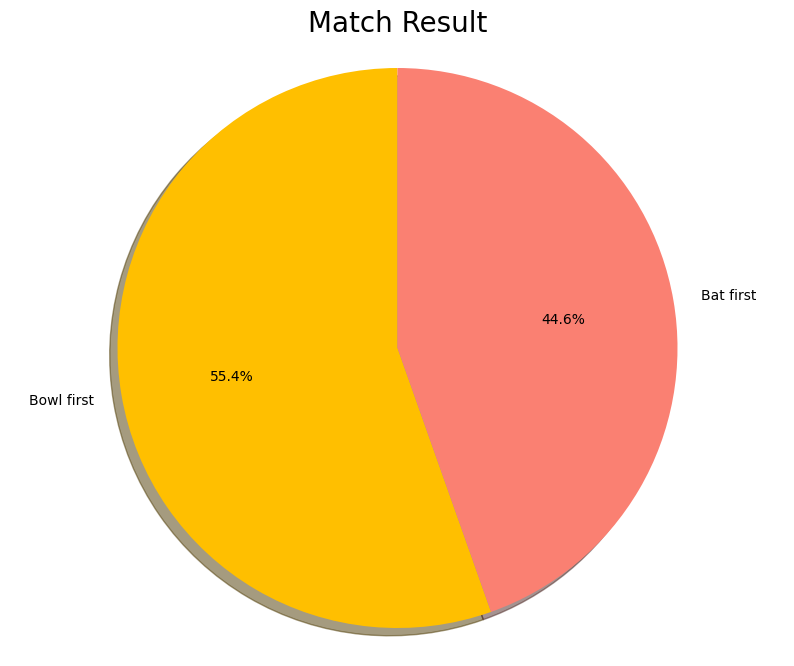

In [119]:
win=mat_df.win_by.value_counts()
labels=np.array(win.index)
sizes = win.values
colors = ['#FFBF00', '#FA8072']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Match Result',fontsize=20)
plt.axis('equal')
plt.show()

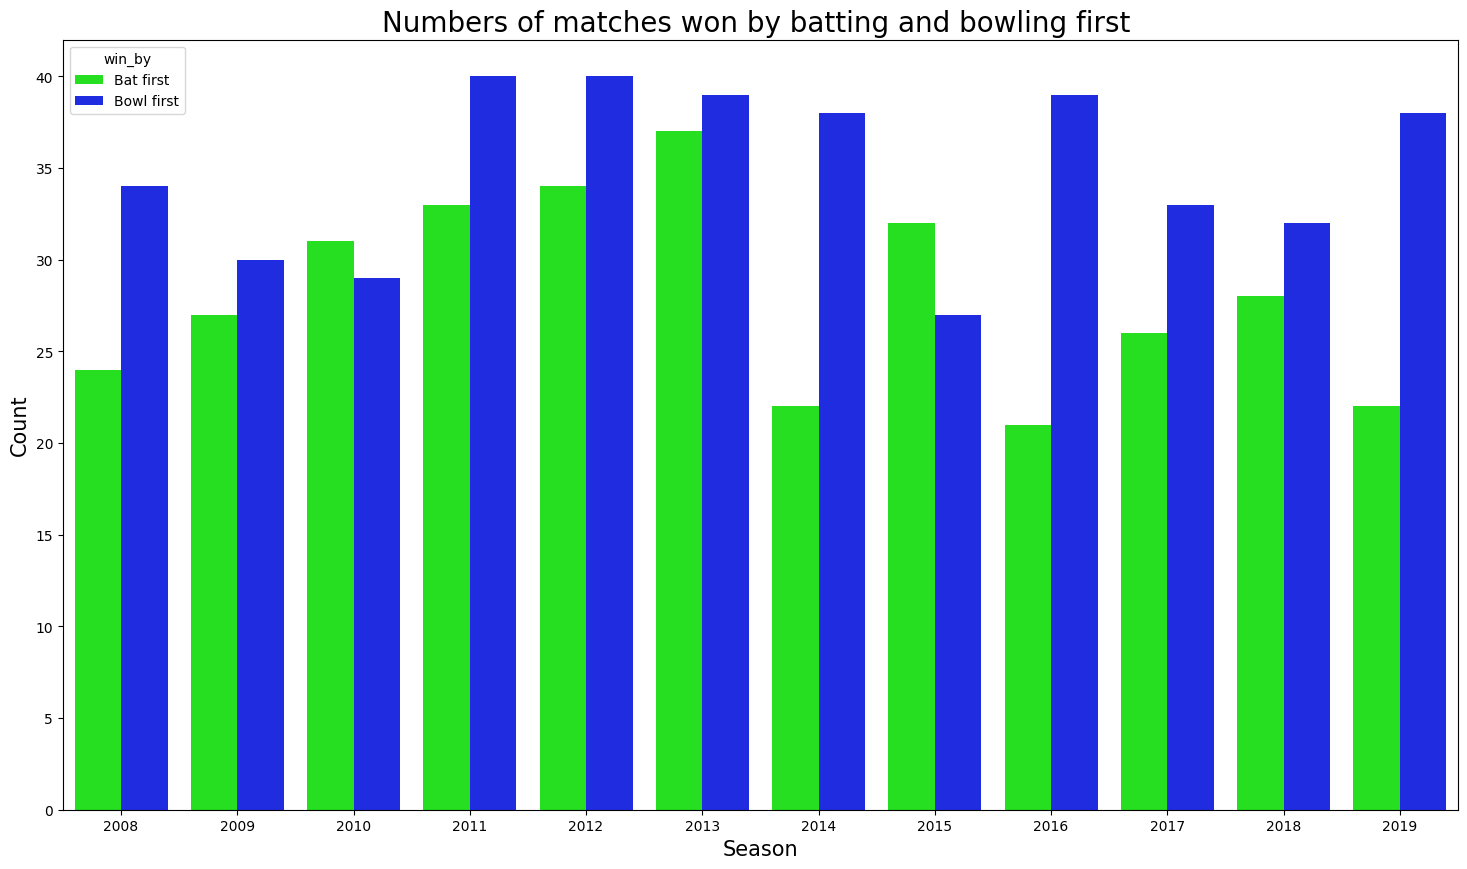

In [120]:
plt.figure(figsize = (18,10))
sns.countplot(x='season',hue='win_by',data=mat_df,palette='hsv')
plt.title("Numbers of matches won by batting and bowling first ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

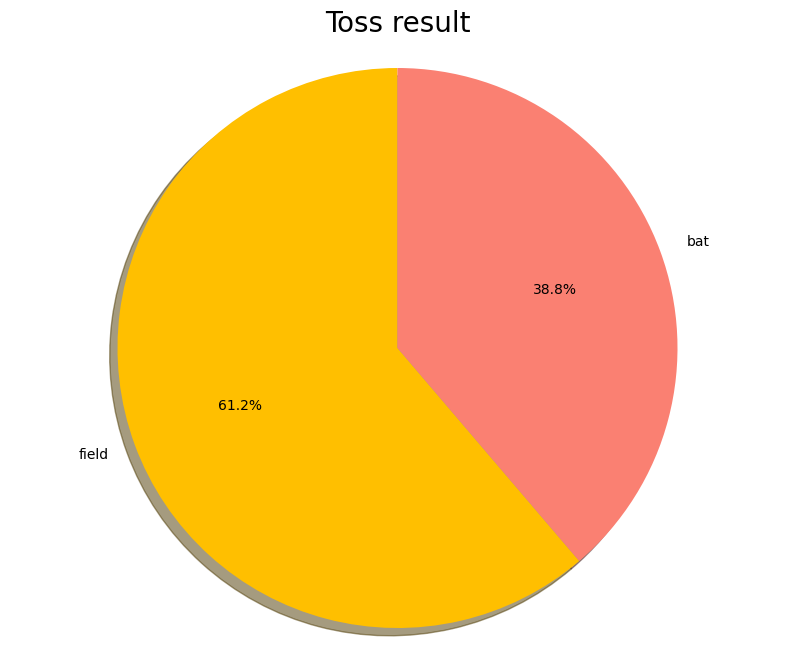

In [121]:
# we will plot pie chart on Toss decision
Toss=mat_df.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['#FFBF00', '#FA8072']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss result',fontsize=20)
plt.axis('equal')
plt.show()

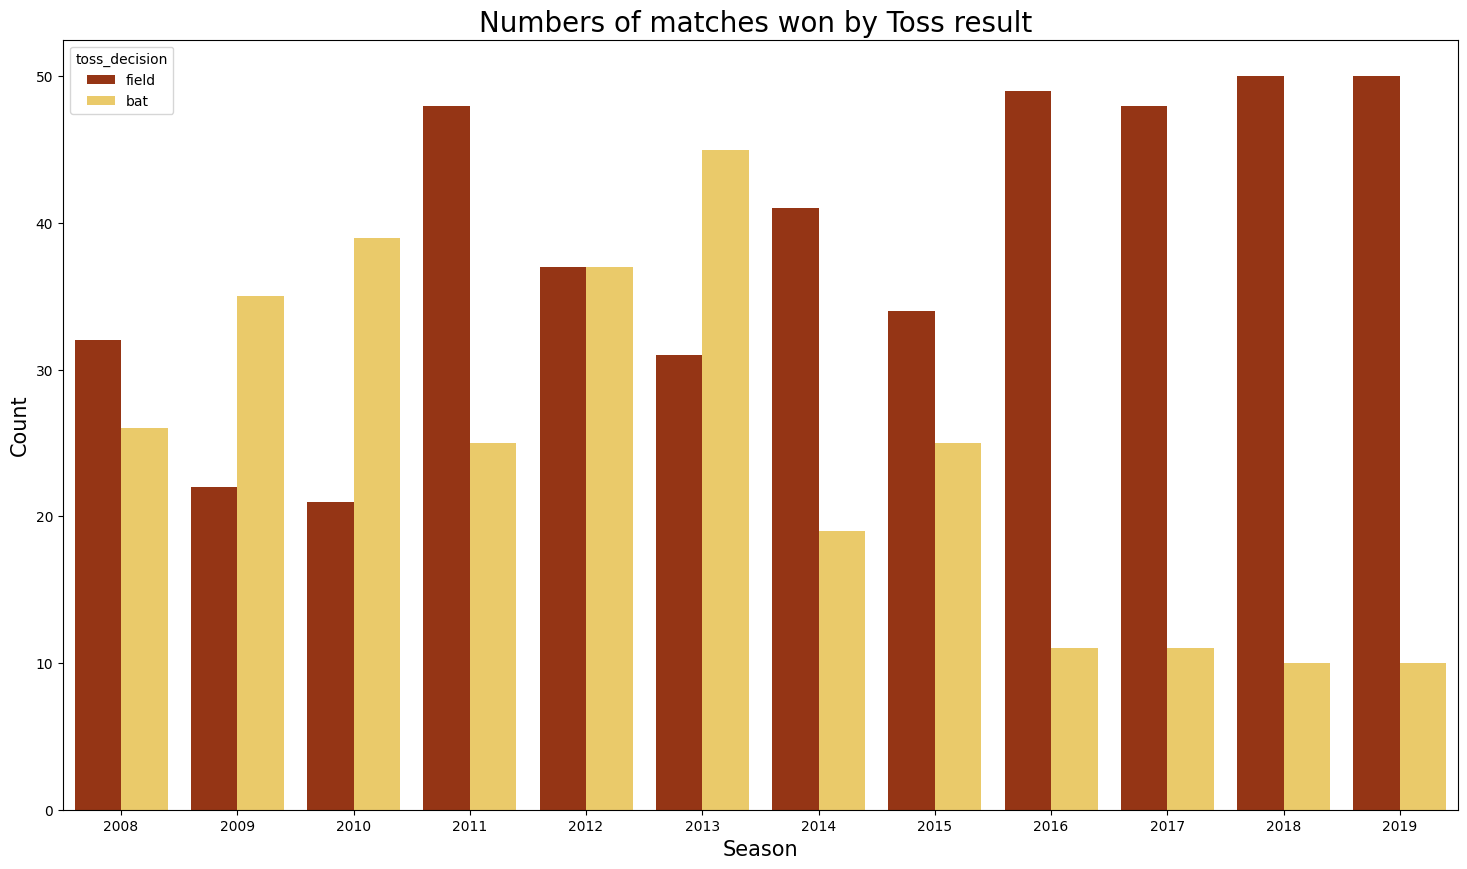

In [122]:
# we will plot graph on Numbers of matches won by Toss result
plt.figure(figsize = (18,10))
sns.countplot(x='season',hue='toss_decision',data=mat_df,palette='afmhot')
plt.title("Numbers of matches won by Toss result ",fontsize=20)
plt.xlabel("Season",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

In [123]:
# we will print winner season wise
final_matches=mat_df.drop_duplicates(subset=['season'], keep='last')

final_matches[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


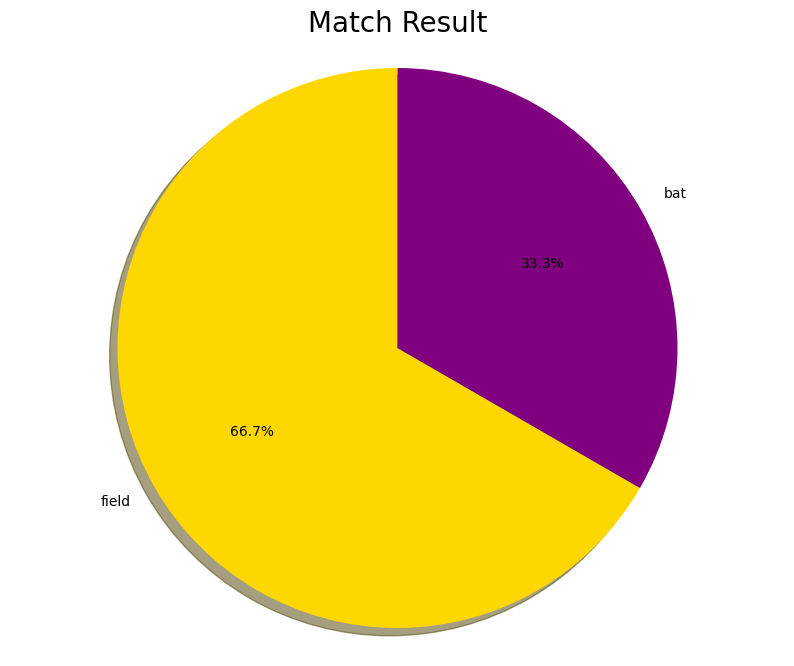

In [124]:
# we will plot pie chart on Winning percentage in final
match = final_matches.win_by.value_counts()
labels=np.array(Toss.index)
sizes = match.values
colors = ['gold', 'purple']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Match Result',fontsize=20)
plt.axis('equal')
plt.show()

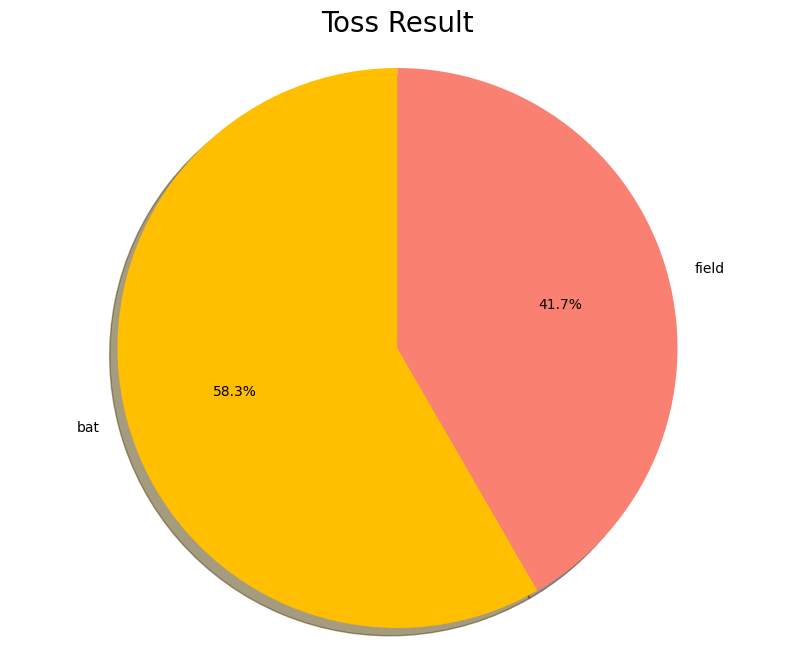

In [125]:

Toss=final_matches.toss_decision.value_counts()
labels=np.array(Toss.index)
sizes = Toss.values
colors = ['#FFBF00', '#FA8072']
plt.figure(figsize = (10,8))
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True,startangle=90)
plt.title('Toss Result',fontsize=20)
plt.axis('equal')
plt.show()

<Figure size 1800x1000 with 0 Axes>

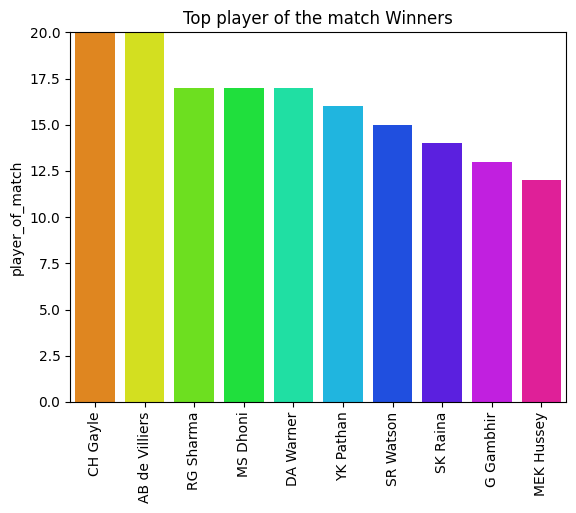

In [126]:
# we will print name of top player in IPL
plt.figure(figsize = (18,10))
top_players = mat_df.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v', palette="hsv");
plt.show()

In [127]:
# We will print IPL Finals venues and winners along with the number of wins.
final_matches.groupby(['city','winner']).size()

city          winner               
Bangalore     Kolkata Knight Riders    1
              Sunrisers Hyderabad      1
Chennai       Chennai Super Kings      1
              Kolkata Knight Riders    1
Hyderabad     Mumbai Indians           2
Johannesburg  Deccan Chargers          1
Kolkata       Mumbai Indians           2
Mumbai        Chennai Super Kings      2
              Rajasthan Royals         1
dtype: int64

In [128]:
# we will print number of season won by teams
final_matches["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

In [129]:
# we will print toss winner, toss decision, winner in final matches.
final_matches[['toss_winner','toss_decision','winner']].reset_index(drop=True)

,toss_winner,toss_decision,winner
0,Mumbai Indians,bat,Mumbai Indians
1,Rajasthan Royals,field,Rajasthan Royals
2,Royal Challengers Bangalore,field,Deccan Chargers
3,Chennai Super Kings,bat,Chennai Super Kings
4,Chennai Super Kings,bat,Chennai Super Kings
5,Chennai Super Kings,bat,Kolkata Knight Riders
6,Mumbai Indians,bat,Mumbai Indians
7,Kolkata Knight Riders,field,Kolkata Knight Riders
8,Chennai Super Kings,field,Mumbai Indians
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad


In [130]:
# we will print man of the match
final_matches[['winner','player_of_match']].reset_index(drop=True)

,winner,player_of_match
0,Mumbai Indians,KH Pandya
1,Rajasthan Royals,YK Pathan
2,Deccan Chargers,A Kumble
3,Chennai Super Kings,SK Raina
4,Chennai Super Kings,M Vijay
5,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,MK Pandey
8,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,BCJ Cutting


In [131]:
len(final_matches[final_matches['toss_winner']==final_matches['winner']]['winner'])

9

In [132]:
# we will print numbers of fours hit by team
four_data=merge_df[merge_df['batsman_runs']==4]
four_data.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')])


,runs by fours,fours
batting_team,,
Chennai Super Kings,8772,2193
Deccan Chargers,3828,957
Delhi Capitals,968,242
Delhi Daredevils,8632,2158
Gujarat Lions,1840,460
Kings XI Punjab,9832,2458
Kochi Tuskers Kerala,680,170
Kolkata Knight Riders,9736,2434
Mumbai Indians,10352,2588


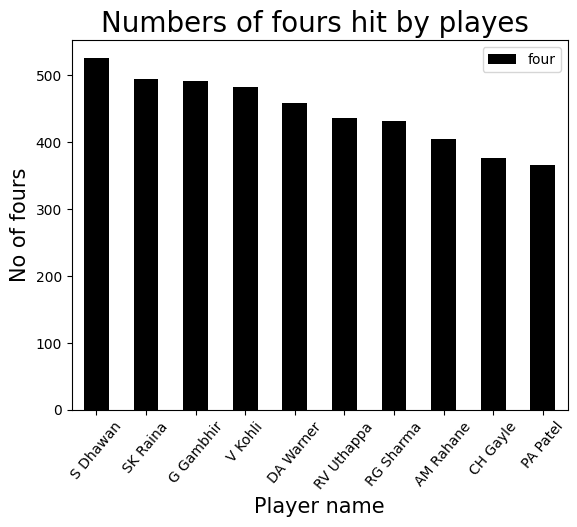

In [133]:
# we will plot graph on four hit by players
batsman_four=four_data.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax=batsman_four.iloc[:10,:].plot('batsman','four',kind='bar',color='black')
plt.title("Numbers of fours hit by playes ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player name",fontsize=15)
plt.ylabel("No of fours",fontsize=15)
plt.show()

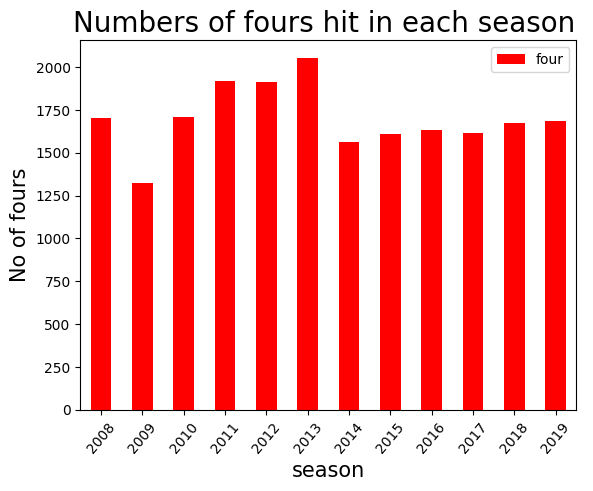

In [134]:
# we will plot graph on no of four hit in each season
ax=four_data.groupby('season')['batsman_runs'].agg([('four','count')]).reset_index().plot('season','four',kind='bar',color = 'red')
plt.title("Numbers of fours hit in each season ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("season",fontsize=15)
plt.ylabel("No of fours",fontsize=15)
plt.show()

In [135]:
# we will print no of sixes hit by team
six_data=merge_df[merge_df['batsman_runs']==6]
six_data.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])

,runs by six,sixes
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


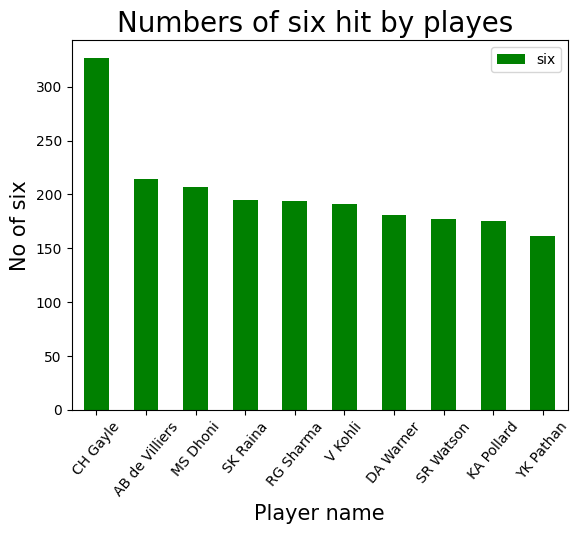

In [136]:
# we will plot graph of six hit by players
batsman_six=six_data.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=batsman_six.iloc[:10,:].plot('batsman','six',kind='bar',color='green')
plt.title("Numbers of six hit by playes ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player name",fontsize=15)
plt.ylabel("No of six",fontsize=15)
plt.show()


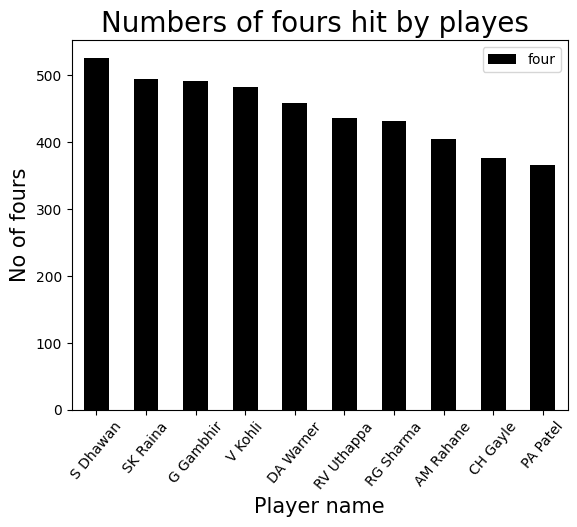

In [137]:
# we will plot graph on four hit by players
batsman_four=four_data.groupby('batsman')['batsman_runs'].agg([('four','count')]).reset_index().sort_values('four',ascending=0)
ax=batsman_four.iloc[:10,:].plot('batsman','four',kind='bar',color='black')
plt.title("Numbers of fours hit by playes ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player name",fontsize=15)
plt.ylabel("No of fours",fontsize=15)
plt.show()

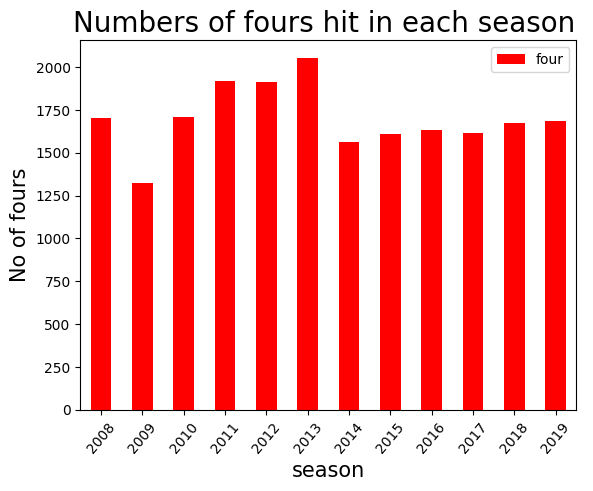

In [138]:
# we will plot graph on no of four hit in each season
ax=four_data.groupby('season')['batsman_runs'].agg([('four','count')]).reset_index().plot('season','four',kind='bar',color = 'red')
plt.title("Numbers of fours hit in each season ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("season",fontsize=15)
plt.ylabel("No of fours",fontsize=15)
plt.show()

In [139]:
# we will print no of sixes hit by team
six_data=merge_df[merge_df['batsman_runs']==6]
six_data.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])

,runs by six,sixes
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


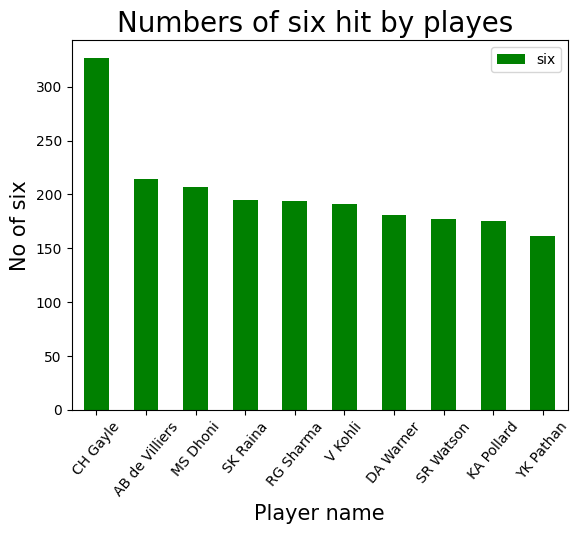

In [140]:
# we will plot graph of six hit by players
batsman_six=six_data.groupby('batsman')['batsman_runs'].agg([('six','count')]).reset_index().sort_values('six',ascending=0)
ax=batsman_six.iloc[:10,:].plot('batsman','six',kind='bar',color='green')
plt.title("Numbers of six hit by playes ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("Player name",fontsize=15)
plt.ylabel("No of six",fontsize=15)
plt.show()

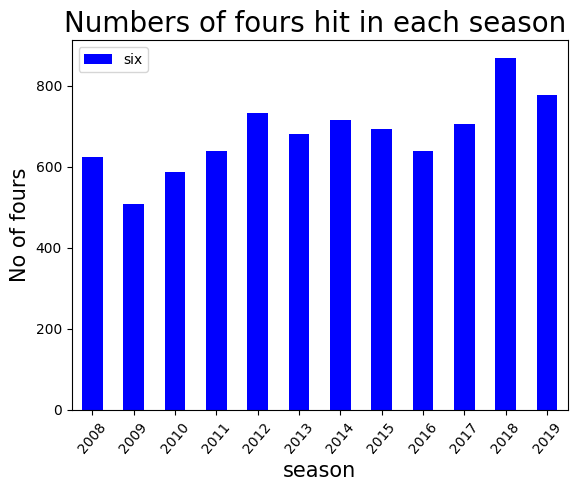

In [141]:
# we will plot graph on no of six hit in each season
ax=six_data.groupby('season')['batsman_runs'].agg([('six','count')]).reset_index().plot('season','six',kind='bar',color = 'blue')
plt.title("Numbers of fours hit in each season ",fontsize=20)
plt.xticks(rotation=50)
plt.xlabel("season",fontsize=15)
plt.ylabel("No of fours",fontsize=15)
plt.show()

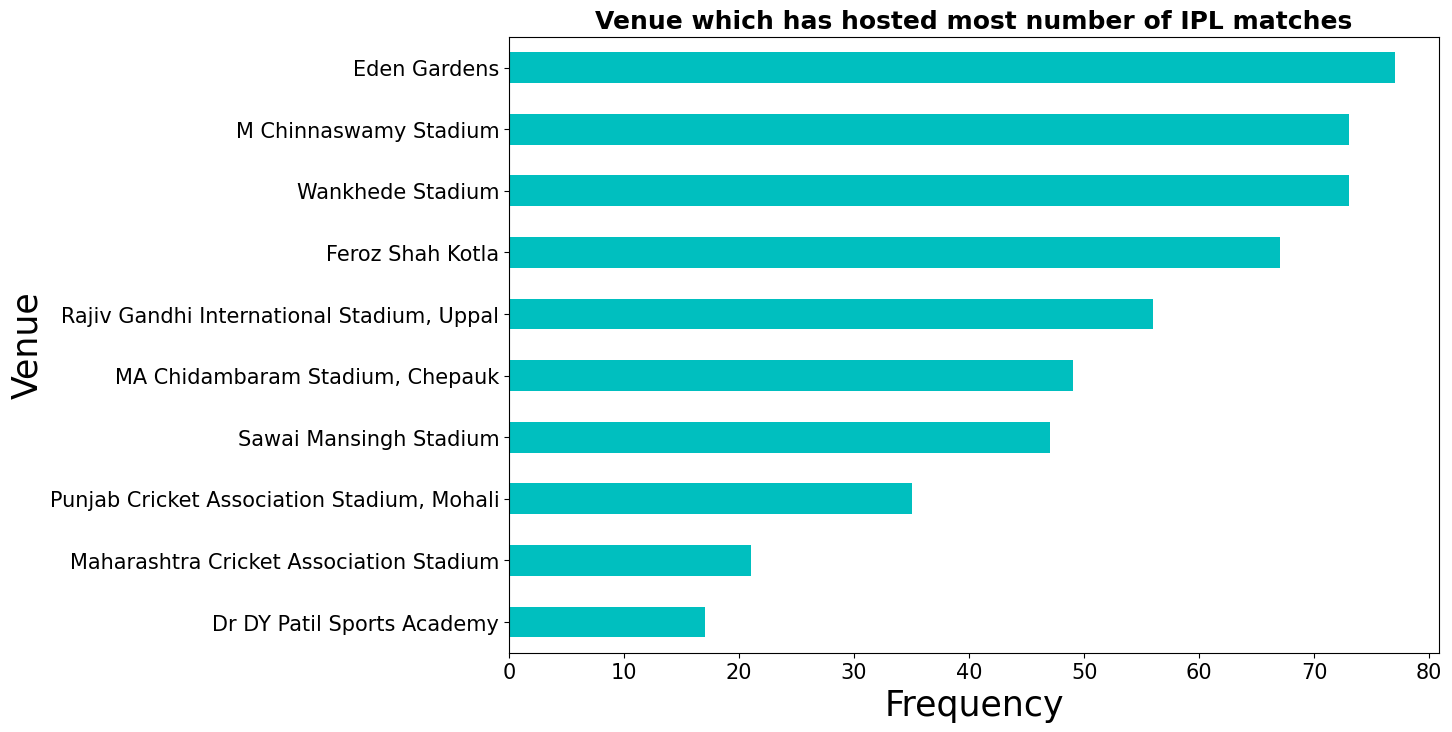

In [142]:
# matches_df["venue"].value_counts().sort_values(ascending = True).tail(10)
mat_df["venue"].value_counts().sort_values(ascending = True).tail(10).plot(kind = 'barh',figsize=(12,8), fontsize=15, color='c')
plt.title("Venue which has hosted most number of IPL matches",fontsize=18,fontweight="bold")
plt.ylabel("Venue", size = 25)
plt.xlabel("Frequency", size = 25)
plt.show()

In [143]:
# We will print the top 10 leading run scorer in IPL
batsman_score=del_df.groupby('batsman')['batsman_runs'].agg(['sum']).reset_index().sort_values('sum',ascending=False).reset_index(drop=True)
batsman_score=batsman_score.rename(columns={'sum':'batsman_runs'})
print("*** Top 10 Leading Run Scorer in IPL ***")
batsman_score.iloc[:10,:]

*** Top 10 Leading Run Scorer in IPL ***


,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


In [144]:
# we will print no of matches played by batsman
No_Matches_player= del_df[["match_id","player_dismissed"]]
No_Matches_player =No_Matches_player .groupby("player_dismissed")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
No_Matches_player.columns=["batsman","No_of Matches"]
No_Matches_player .head(5)

,batsman,No_of Matches
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137


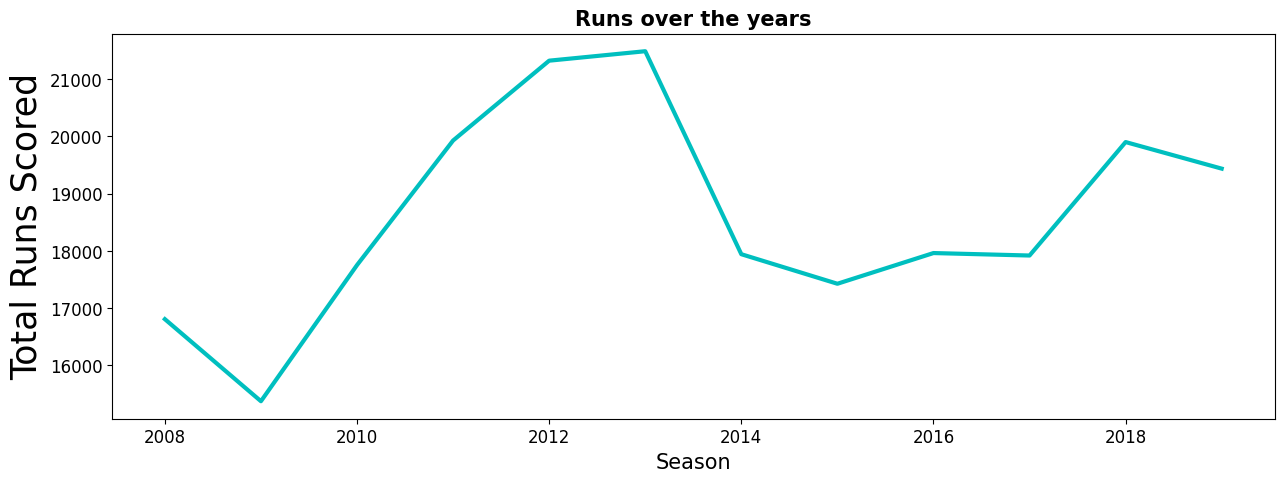

In [145]:
merge_df.groupby('season')['batsman_runs'].sum().plot(kind = 'line', linewidth = 3, figsize =(15,5),color = 'c')
                                                                                          
plt.title("Runs over the years",fontsize= 15, fontweight = 'bold')
plt.xlabel("Season", size = 15)
plt.ylabel("Total Runs Scored", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

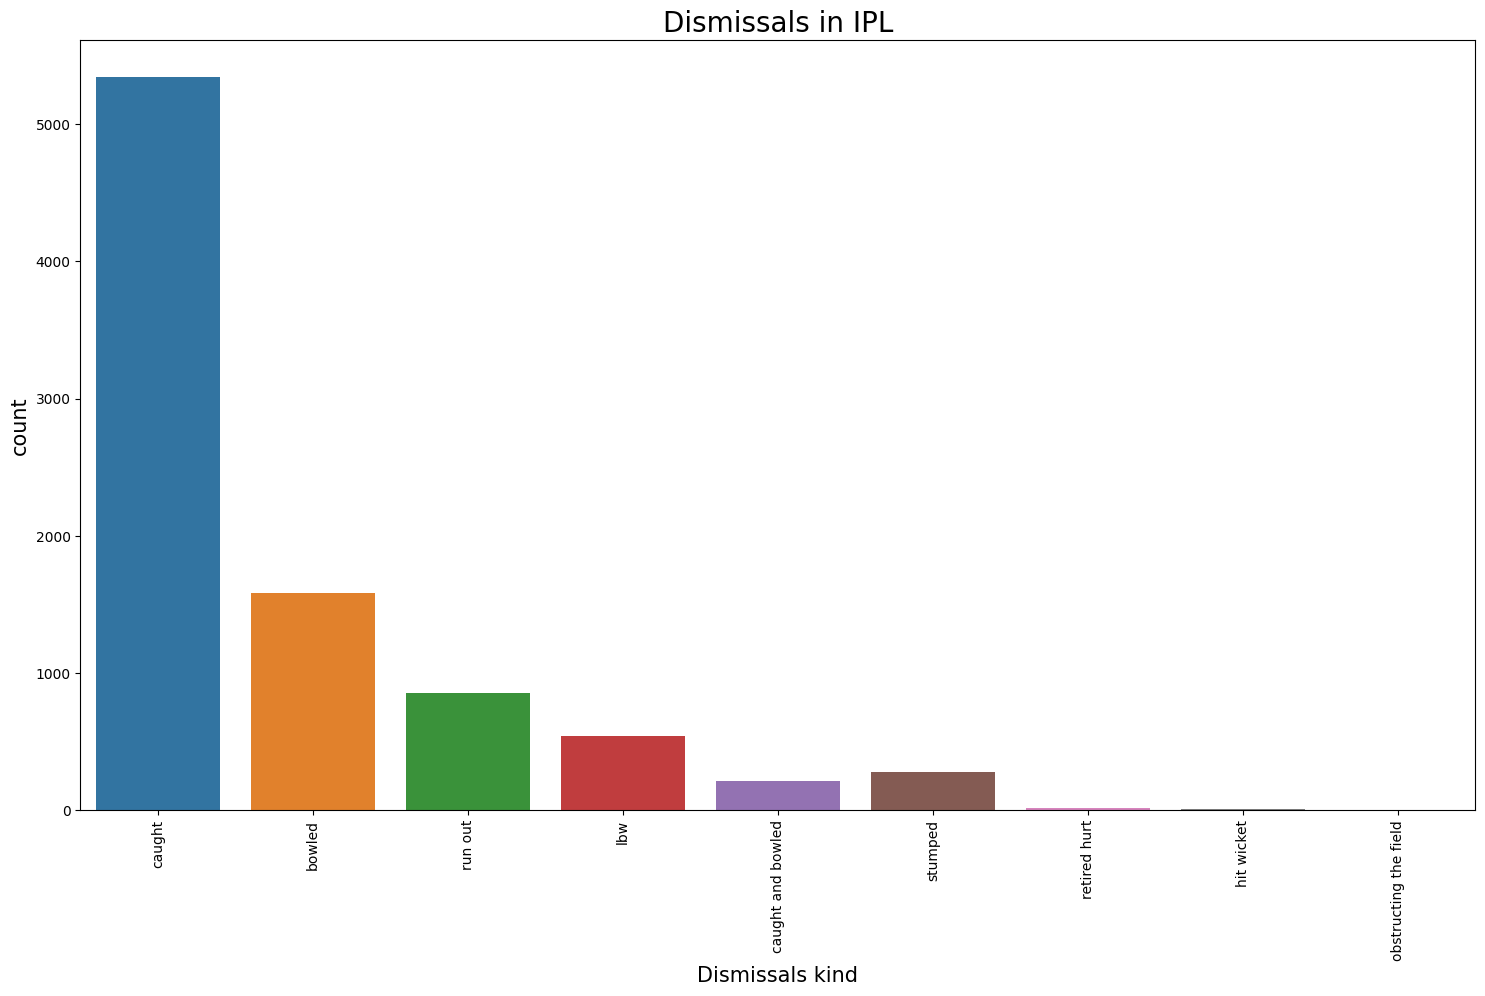

In [146]:
# Dismissals in IPL
plt.figure(figsize=(18,10))
ax=sns.countplot(x=merge_df.dismissal_kind)
plt.title("Dismissals in IPL",fontsize=20)
plt.xlabel("Dismissals kind",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [147]:
wicket_data=merge_df.dropna(subset=['dismissal_kind'])
wicket_data=wicket_data[~wicket_data['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]

In [148]:
# we will print ipl most wicket taking bowlers
wicket_data.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]


,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


## Conclusion :

- The **highest number of match played** in IPL season was **2013,2014,2015**.

- The **highest number of match won by Mumbai Indians** i.e 4 match out of 12 matches.

- **Teams which Bowl first has higher chances of winning** then the team which bat first.

- **After winning toss more teams decide to do fielding first**.

- In finals teams which **decide to do fielding first win the matches**  more then the team which bat first.

- **In finals** most teams after winning toss **decide to do fielding first**.

- **Top player of match** winning are **CH gayle, AB de villers**.

- It is interesting that **out of 12 IPL finals,9 times the team that won the toss was also the winner of IPL**.

- **Most number of matches** played in **Eden Garden**.

- The **highest number of four** hit by player is **Shikar Dhawan**.

- The **highest number of six** hit by player is **CH gayle**.

- **Top leading run scorer** in IPL are **Virat kholi, SK Raina, RG Sharma**.

- The **highest number of matches** played by player name are **SK Raina, RG Sharma**.

- **Dismissals in IPL was most by Catch out** .

- The **IPL most wicket** taken blower is **SL Malinga**.